In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse

In [ ]:
# seed 값 설정
seed = 42
np.random.seed(seed)  # 무작위 추출
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train),(x_test,y_test)  = load_data(path='mnist.npz')

In [ ]:
# 학습데이터
print(x_train.shape, y_train.shape)
print(y_train)

# 테스트 데이터
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


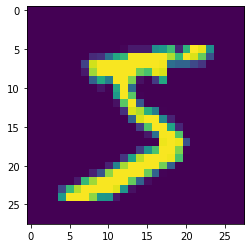

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
# X_train[0] : 모든 이미지 보관

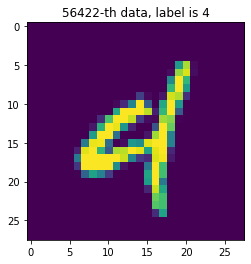

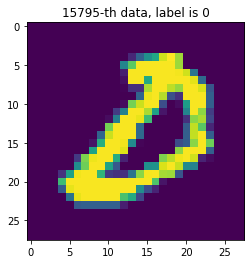

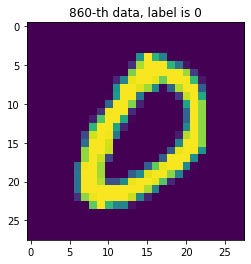

In [ ]:
import matplotlib.pyplot as plt
sample_size = 3

random_idx = np.random.randint(60000,size=sample_size)

for idx in random_idx:
  img = x_train[idx,:]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' % (idx,label))

In [ ]:
# 모델 입력을 위한 데이터 전처리
# 차원 변환 (2차원 >>> 1차원) reshape
x_train.reshape(x_train.shape[0], 784) # 784 = 28*28

# 데이터 타입 변경(정수 >>> 실수) 0~255 (흑백사진:명도)
x_train = x_train.astype('float64')

# 정규화 0~1
x_train / 255

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
x_test = x_test.reshape(x_test.shape[0],784).astype('float64') / 255
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# 클래스 값 확인
print('class : %d' % (y_train[0]))

class : 5


In [ ]:
# 클래스 값을 바이너리화 결정
# 각 데이터의 레이블을 범주형 형태로 변환

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train,y_test)

[[[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 ...

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]] [[0. 0. 0.

In [18]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf


In [41]:
# seed 값 설정
seed = 3
np.random.seed(seed)  # 무작위 추출
tf.random.set_seed(3)

In [42]:
# MNIST 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [43]:
import sys

for x in x_train[0]:
  for i in x:
    sys.stdout.write('%d\t'%i)
  sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [44]:
# 정규화
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32') / 255

In [45]:
print('class : %d ' % (y_train[0]))

class : 5 


In [46]:
# 바이너리화(one-hot encoding)
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [47]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [48]:
# 모델 생성(프레임 설정: 환경설정), 은닉층 1개
model = Sequential()

# Seqential() 모델은 별도의 입력층이 없음.
# 대신, 첫번째 Dense layer에 input_dim 존재
# 활성화함수 : relu 사용
model.add(Dense(512, input_dim=784, activation = 'relu'))

# 출력결과가 10개 분류(0-9), 다중분류: softmax
model.add(Dense(10, activation = 'softmax'))

In [49]:
# 모델실행 환경설정
model.compile(loss = 'categorical_crossentropy',  # loss : cost function: 범주형 크로스엔트로피
              optimizer = 'adam',                 # 최적화함수: adam
              metrics=['acc'])               # 측정지표: 정확도

In [50]:
# 모델 최적화 설정
MODEL_DIR = './model/'  # 모델 디렉토리 생성(폴더)
if not os.path.exists(MODEL_DIR): # 모델 디렉토리 폴더가 없다면,
  os.mkdir(MODEL_DIR)             # 만든다(mkdir)

modelpath= './model/{epoch:02d}-{val_loss: .4f}.hdf5' # 모델 저장 경로 생성
checkpointer = ModelCheckpoint(filepath = modelpath,
                               monitor = 'val_loss',
                               verbose=1, save_best_only = True)

# val_loss 를 monitoring 주시함. verbose: 결과, 상황판, 성능이 나아진 것만 보기
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)
# val_loss 를 monitoring 주시함. x이상 돌려서 성능이 나아지지 않으면 중지(조기종료)

In [51]:
# 모델 실행(학습: 훈련용 데이터 셋으로 하세요)
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),
          epochs=30, batch_size=200, verbose=0,
          callbacks=[early_stopping_callback,checkpointer])

print(f'테스트 정확도: {model.evaluate(x_test,y_test)[1]}:.4f')
# 모델 학습 : fit , 훈련용 데이터로 함 
# 검증 데이터(validation_data : 테스트 데이터 사용)
# epochs : 반복횟수, batch_size : 샘플 200개 추출,  verbose: 훈련상황 보여줌 
# callbacks : 조기종료, 성능개선 여부 확인


Epoch 1: val_loss improved from inf to 0.14751, saving model to ./model/01- 0.1475.hdf5

Epoch 2: val_loss improved from 0.14751 to 0.10183, saving model to ./model/02- 0.1018.hdf5

Epoch 3: val_loss improved from 0.10183 to 0.08871, saving model to ./model/03- 0.0887.hdf5

Epoch 4: val_loss improved from 0.08871 to 0.07823, saving model to ./model/04- 0.0782.hdf5

Epoch 5: val_loss improved from 0.07823 to 0.07423, saving model to ./model/05- 0.0742.hdf5

Epoch 6: val_loss improved from 0.07423 to 0.06748, saving model to ./model/06- 0.0675.hdf5

Epoch 7: val_loss improved from 0.06748 to 0.06501, saving model to ./model/07- 0.0650.hdf5

Epoch 8: val_loss improved from 0.06501 to 0.06319, saving model to ./model/08- 0.0632.hdf5

Epoch 9: val_loss did not improve from 0.06319

Epoch 10: val_loss improved from 0.06319 to 0.06214, saving model to ./model/10- 0.0621.hdf5

Epoch 11: val_loss did not improve from 0.06214

Epoch 12: val_loss did not improve from 0.06214

Epoch 13: val_loss 

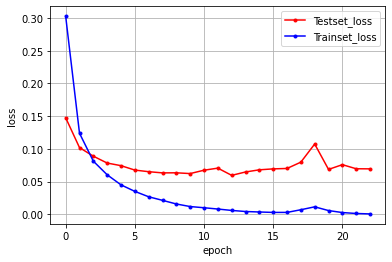

In [52]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len,y_vloss, marker='.',c='red',label='Testset_loss')
plt.plot(x_len,y_loss, marker='.',c='blue',label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()